In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [4]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
plt.style.use('dark_background')


In [6]:
titanic = pd.read_csv("train.csv")
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
tips = pd.read_csv("tips.csv")
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [8]:
heart = pd.read_csv("heart.csv")
heart.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [9]:
wine = pd.read_csv("WineQT.csv")
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


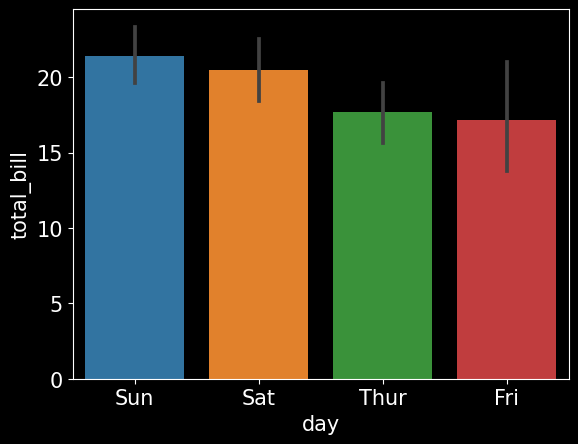

In [10]:
sns.barplot(x='day', y='total_bill', data=tips, palette='tab10');

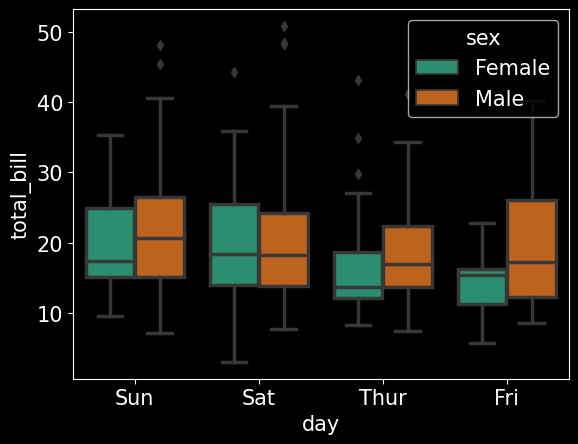

In [11]:
sns.boxplot(x='day', y='total_bill', hue='sex', data=tips, linewidth=2.5, palette='Dark2');

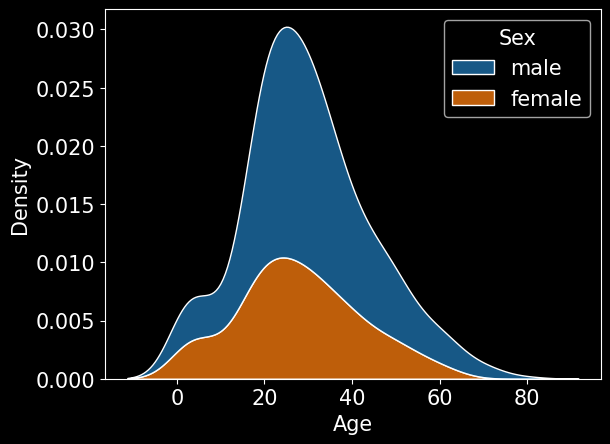

In [12]:
sns.kdeplot(data=titanic, x='Age', hue='Sex', multiple='stack',palette='tab10');


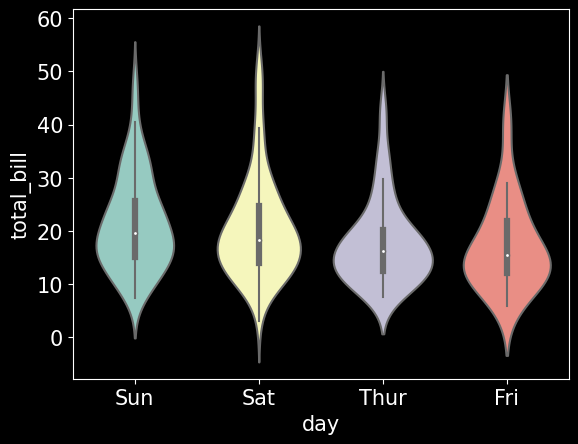

In [13]:
sns.violinplot(x="day", y="total_bill", data=tips);

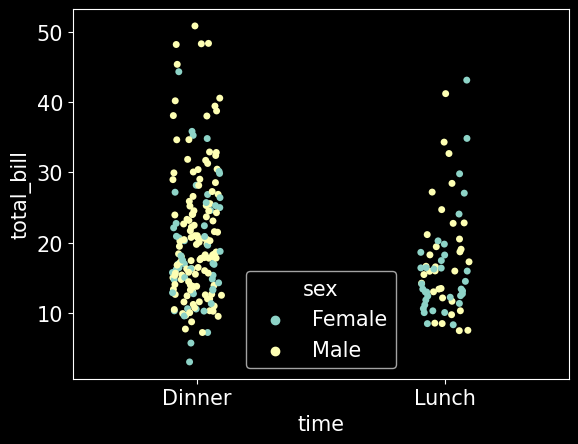

In [14]:
sns.stripplot(x="time", y="total_bill", hue="sex", data=tips);

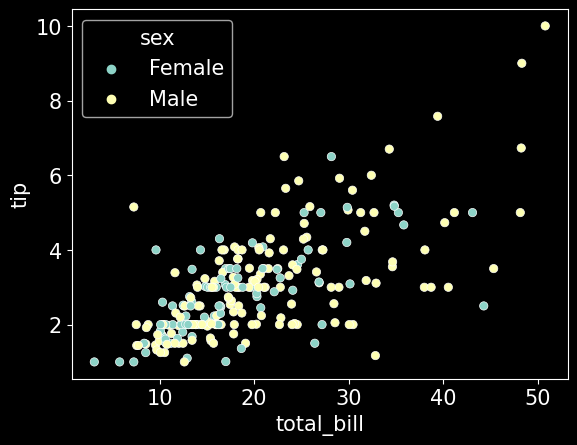

In [15]:
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'sex', data = tips);

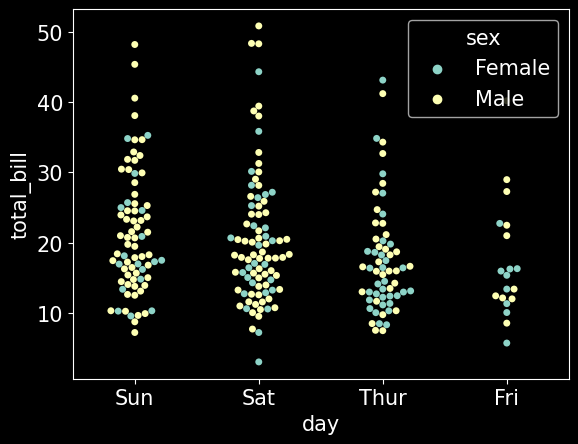

In [16]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

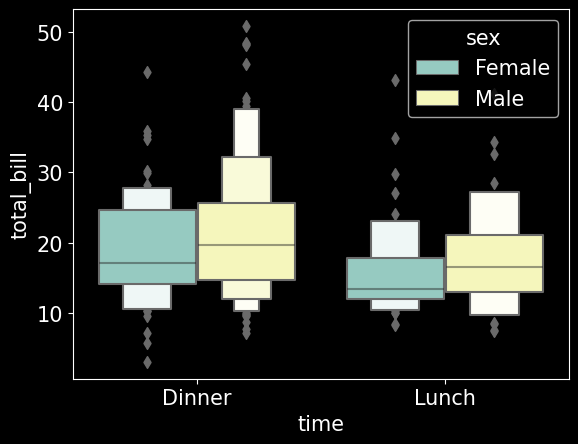

In [17]:
sns.boxenplot( x='time', y="total_bill", hue='sex', data=tips);

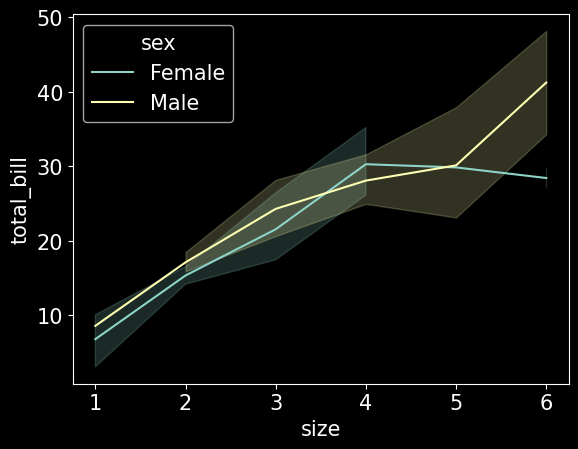

In [18]:
sns.lineplot(x="size",y="total_bill",data=tips,hue='sex',markers=True);

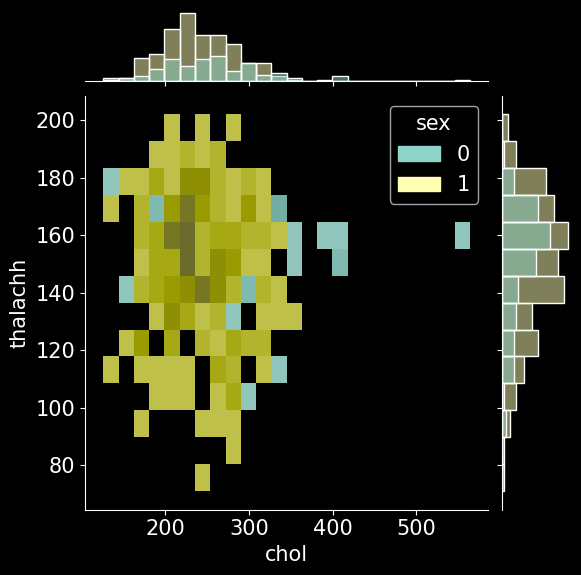

In [19]:
sns.jointplot(x="chol",y="thalachh",data=heart,kind="hist",hue='sex');

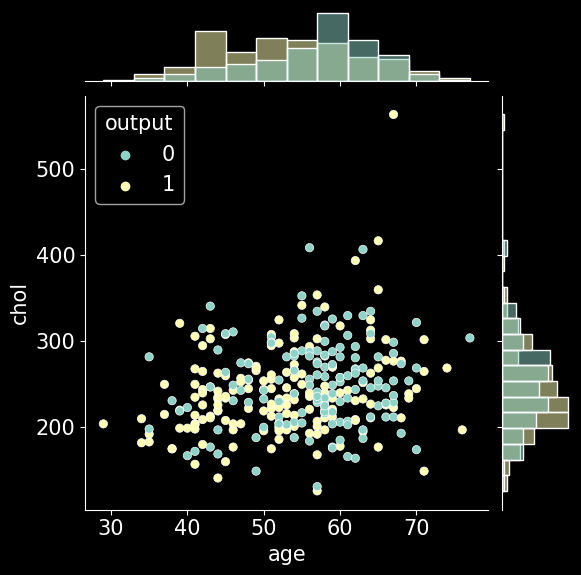

In [21]:
g = sns.JointGrid(data=heart, x="age", y="chol", hue="output")
g.plot(sns.scatterplot, sns.histplot);


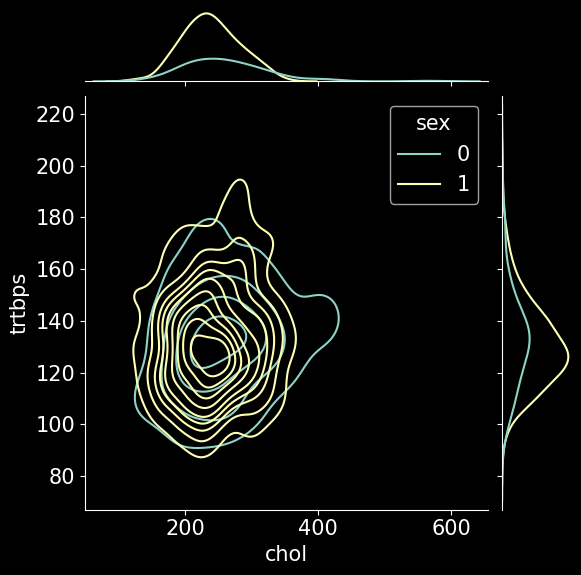

In [22]:
sns.jointplot(x="chol",y="trtbps",data=heart,kind="kde",hue='sex');

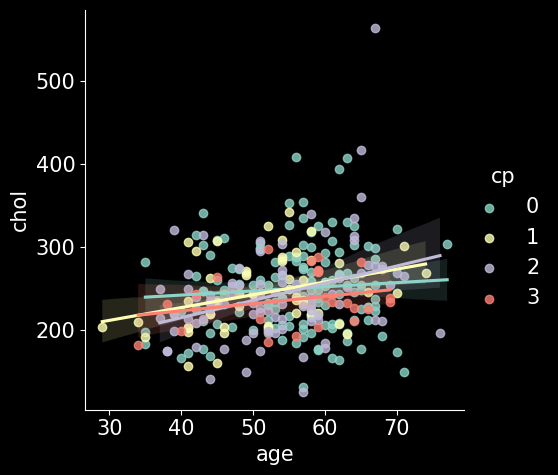

In [23]:
g= sns.lmplot(x="age", y="chol", hue="cp", data=heart)

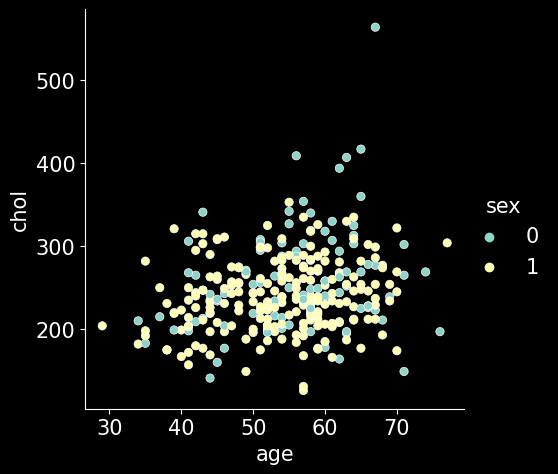

In [24]:
g = sns.relplot(x="age", y="chol", data=heart,hue='sex')

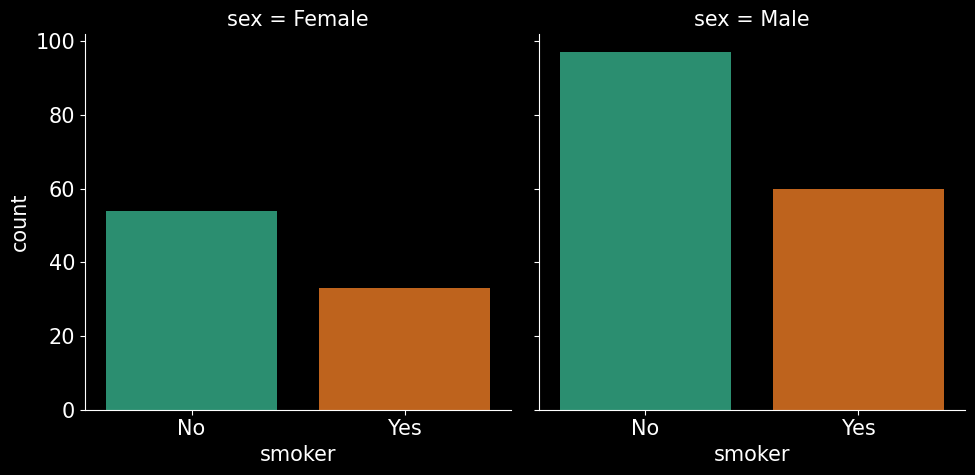

In [27]:
sns.catplot(x='smoker', col='sex', kind='count', data=tips ,palette="Dark2");


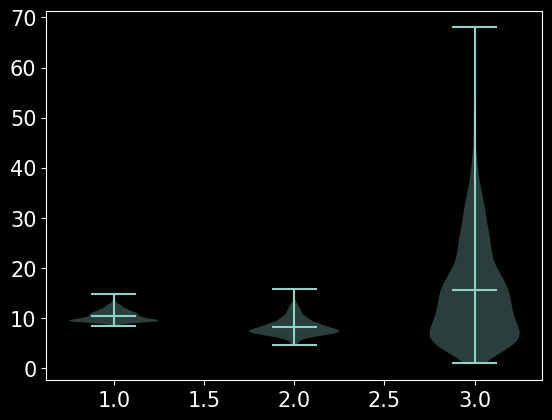

In [30]:
plt.violinplot([wine["alcohol"], wine['fixed acidity'],wine['free sulfur dioxide']], positions=[1,2,3], showmeans=True)
plt.show()

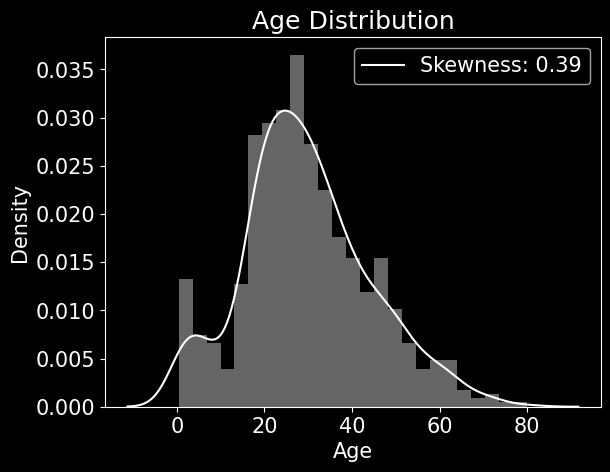

In [31]:
bar = sns.distplot(titanic["Age"],color='white',kde=True,bins=25)
bar.legend(["Skewness: {:.2f}".format(titanic['Age'].skew())])
plt.title("Age Distribution");

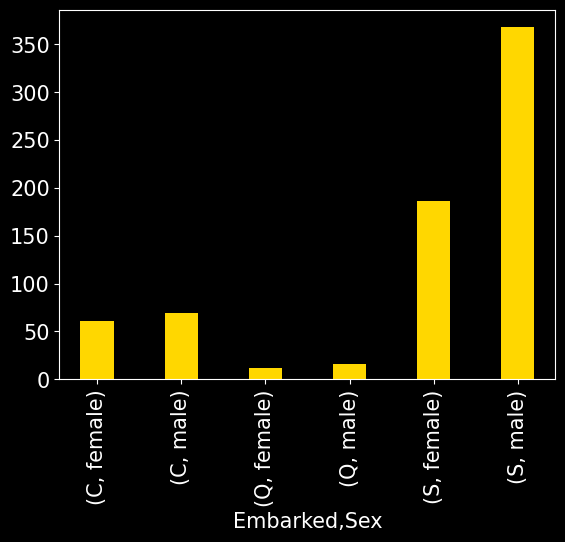

In [33]:
color = plt.cm.copper(np.linspace(0, 1, 10))
titanic.groupby(['Embarked','Sex'])['Age'].count().plot(kind='bar', width=.4,color='gold');

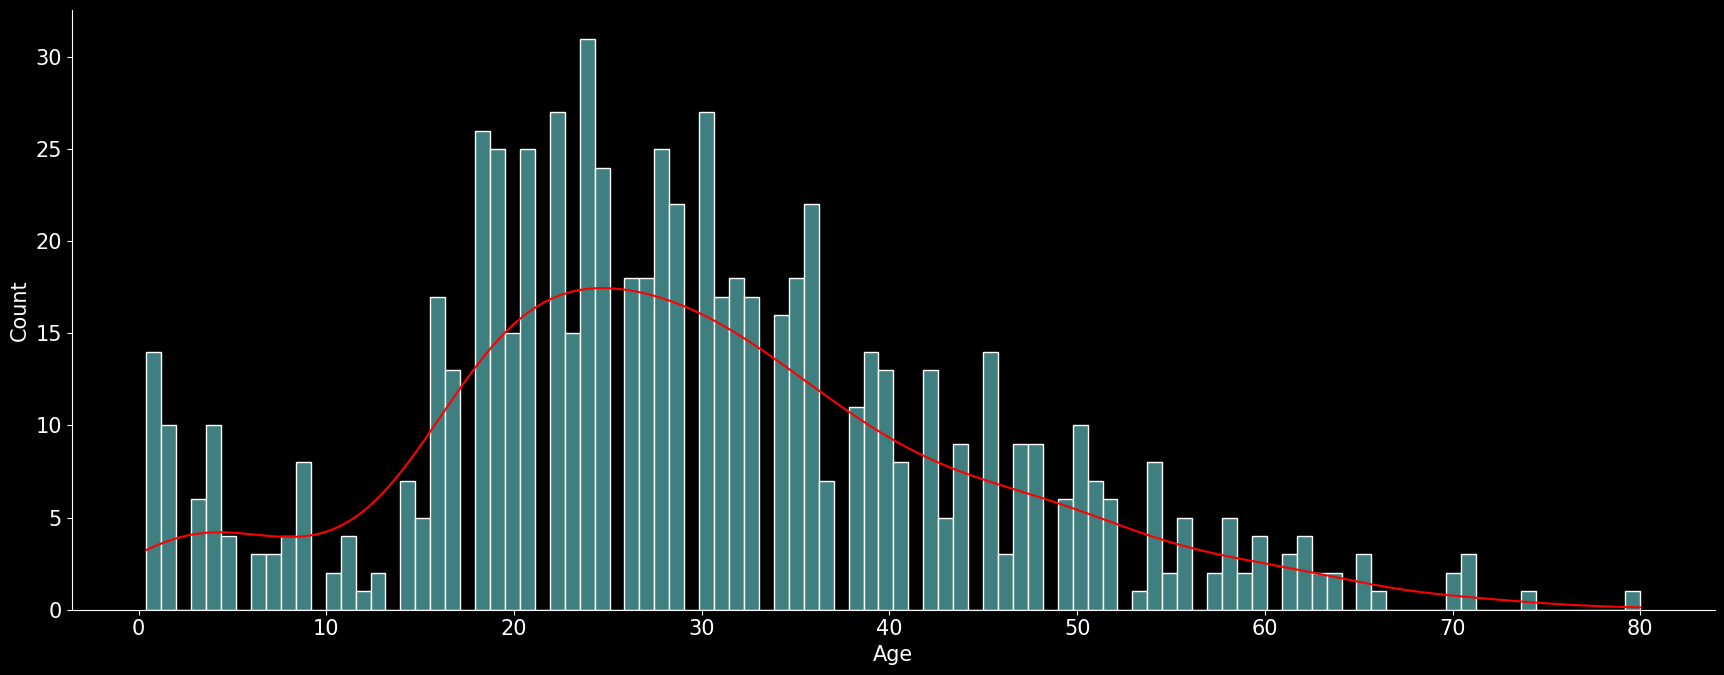

In [35]:
sns.displot(data=titanic, x="Age", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 7, aspect = 2.5);

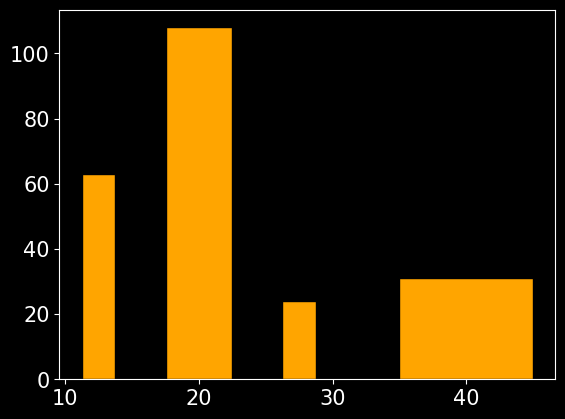

In [36]:
plt.hist(tips['total_bill'],color='orange',bins=[10,15,25,30,50],edgecolor='black',rwidth=0.5);

In [39]:
heart.head(1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


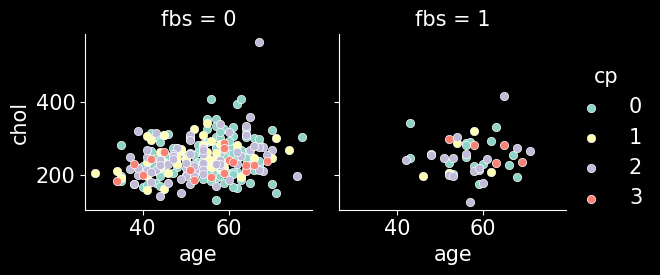

In [40]:
g = sns.FacetGrid(heart, col="fbs", hue="cp")
g.map_dataframe(sns.scatterplot, x="age", y="chol")
g.add_legend();

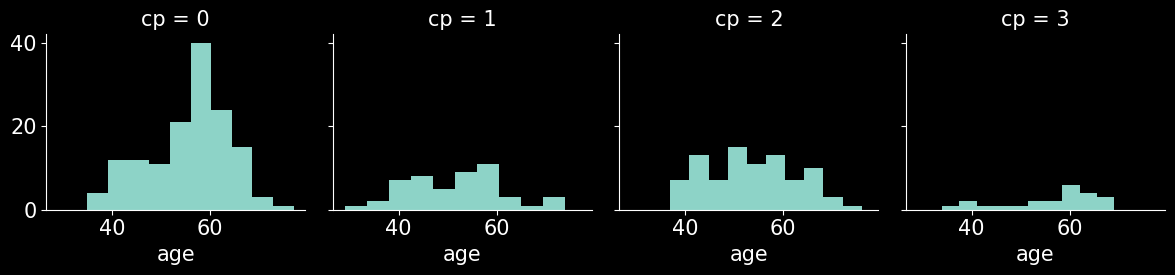

In [41]:
g = sns.FacetGrid(heart, col="cp")
g = g.map(plt.hist, "age");

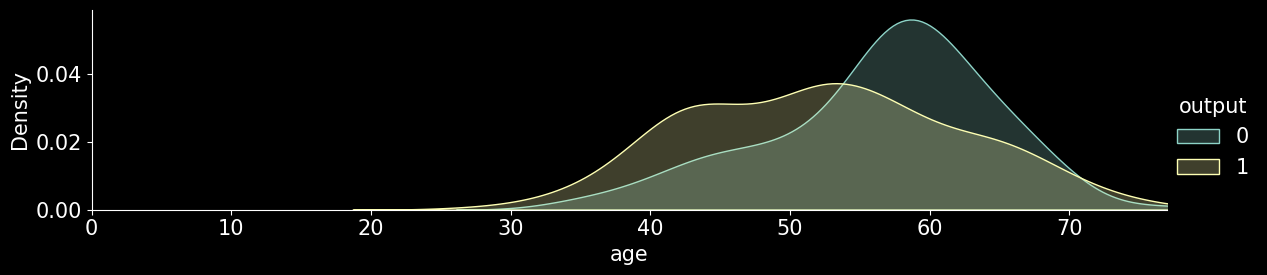

In [42]:
fig = sns.FacetGrid(heart, hue="output", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = heart['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show()

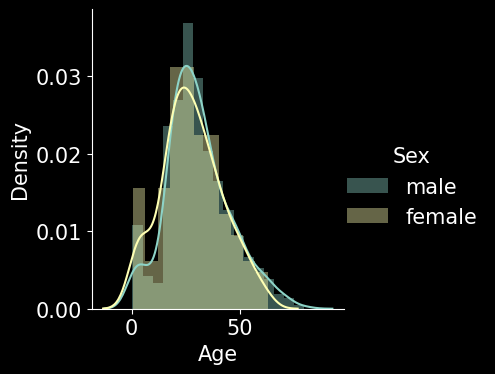

In [43]:
sns.FacetGrid(titanic, hue='Sex', height=4).map(sns.distplot, 'Age').add_legend();

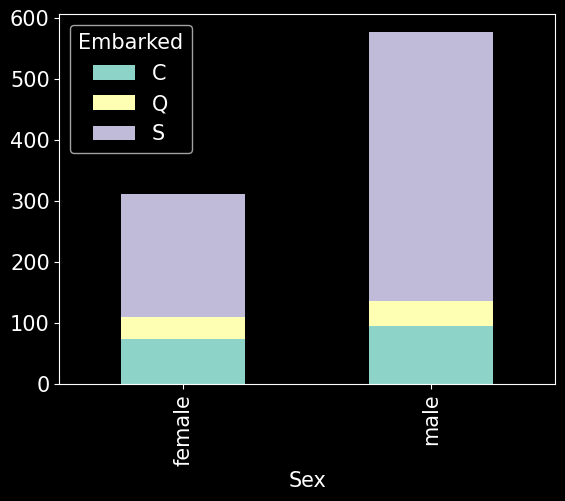

In [44]:
pd.crosstab(titanic['Sex'],titanic['Embarked']).plot(kind='bar',stacked=True);

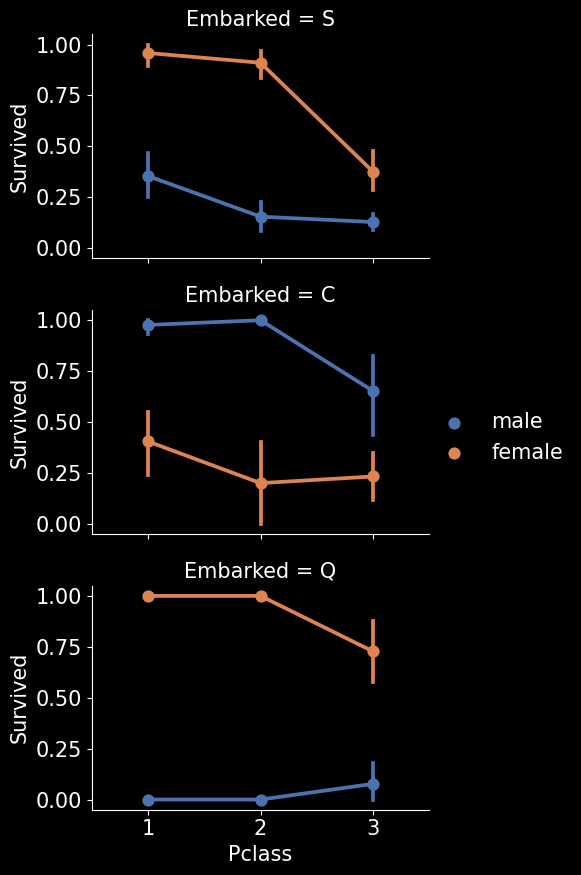

In [45]:
grid = sns.FacetGrid(titanic, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend();

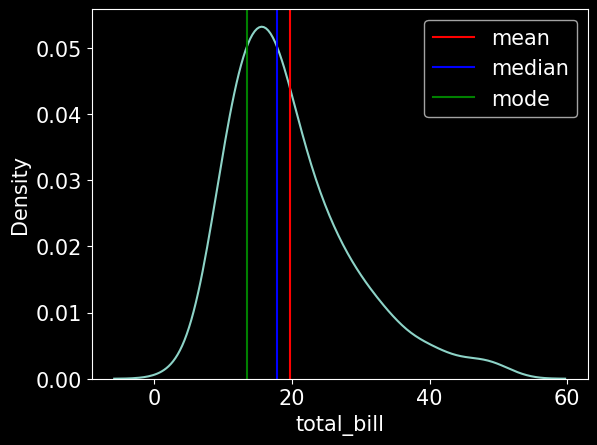

In [46]:
a=tips['total_bill']
mean=a.mean()
median=np.median(a)
mode=a.mode()

sns.distplot(a,hist=False)
plt.axvline(mean,color='r',label='mean')
plt.axvline(median,color='b',label='median')
plt.axvline(mode[0],color='g',label='mode')
plt.legend()
plt.show()

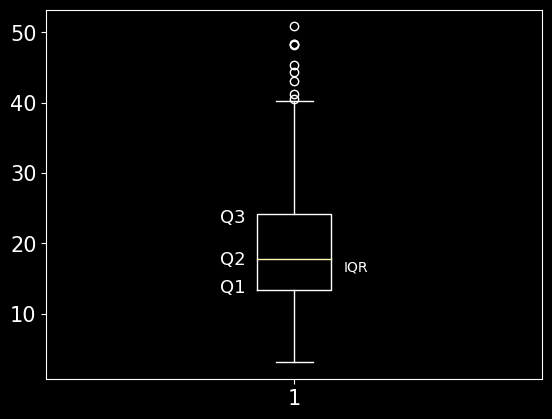

In [47]:
plt.boxplot(a)
plt.text(0.85,13,s='Q1',size=13)
plt.text(0.85,17,s='Q2',size=13)
plt.text(0.85,23,s='Q3',size=13)
plt.text(1.1,16,s='IQR',rotation=0,size=10)
plt.show()

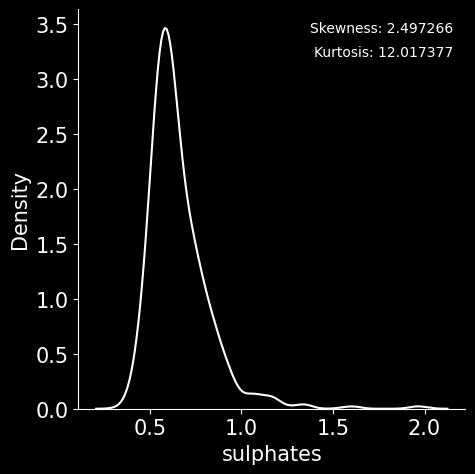

In [49]:
g = sns.displot(data=wine, x="sulphates",kind ='kde',color='white')
for ax in g.axes.ravel():
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % wine['sulphates'].skew(),\
        fontsize=10, verticalalignment='top', horizontalalignment='right')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % wine['sulphates'].kurt(),\
        fontsize=10, verticalalignment='top', horizontalalignment='right')


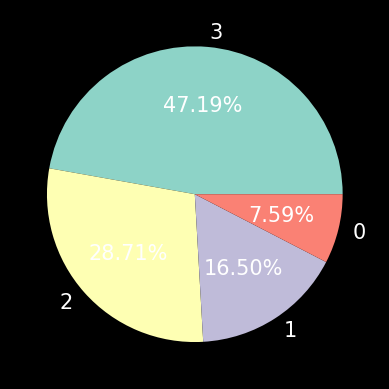

In [50]:
plt.pie(heart['cp'].value_counts(),labels=heart['cp'].unique(),autopct = '%1.2f%%');